<a href="https://colab.research.google.com/github/kiranrode/README.md/blob/master/Copy_of_1_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we start, we need to import all the libraries we need. It's best practice to do this in the beginning. We'll be importing:

* [Pandas](https://pandas.pydata.org/pandas-docs/stable/): Library that will be used to load and manipulate the data
* [Matplotlib](https://matplotlib.org): Used to visualize our data

Some other libraries might be imported for administrative reasons, but they won't be related to what we'd be learning in this lesson.

# Lesson 1: The Data Science Process

What question are you trying to answer? Once you have that, your data science adventure begins. You must go out and find your data. More often than not, the data you have will not be in the form you want it to be in. You'll need to load, clean, transform and, most importantly, understand it (the top part of this diagram). Let's begin!

![alt text](https://revsearch-assets.s3.amazonaws.com/images/ds_process1.png)

## Learning Objectives:

* Learn the data science enviroment:
  * Python
  * Jupyter Notebook
  * Pandas
* Learn the vocabularly of data: 
  * Table Data (versus unstructured data)
  * Features and target (columns)
  * Observations (rows)
* Learn the basics of reading/loading data using Pandas
* Learn how to clean data and deal with missing values
* Learn how to visualize data and understand data better
* Communicate effectively through data


### Definitions
  * **Jupyter Notebook:** The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. You type the code in *cells* here in your browser. When you run a cell, your code runs on the cloud and the results are shown in your browser.
  * **Target Column:** This is the variable that you're trying to predict given other values. This is also called the _response_ / _predicted_ / _dependent_ / _label_ variable.
  * **Feature Columns:** These are the variables that we use to calculate/predict the value of the target. These are also called _explanatory_ / _predictor_ / _feature_ / _signal_ variables. 
  * **Observations:** We have one observation per row. A observation is one instance of our data. In the below, a observation is a basketball player.
  * **Tablular Data:** Data that has been organized into a matrix or table, i.e. into columns and rows. Unstructured data may be speech recordings or pictures. We will be dealing with tabular data. Note, we often interchange the words columns<>variables and rows<>observations.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png" alt="alt" width="500"/>

In [0]:
# We import the required libraries before using them
# In a single Jupyter Notebook, libraries should be imported once and can be 
# used throughout the notebook

# The 'as' keyword just renames the library, making it easier for us to access it
import pandas as pd
from matplotlib import pyplot as plt

## Pandas

Pandas is one of the top (if not the top) data manipulation and analysis libraries for Python right now. It loads data into these easy to access and manipulate structures called _DataFrames_. Data in these is 'arranged' similar to what you might have seen in a spreasheet, with rows specifying data points and columns specifying certain categories/features/variables.

In the following cell we're just setting up some configurations for the library. This will change how the library outputs the data for us to see.

In [0]:
pd.options.display.float_format = "{:.2f}".format # This will make pandas output fractions up to 2 decimal places
pd.options.display.max_rows = 10 # Pandas will output at max 10 rows from the data

## Research Question

We'll be using the a dataset from Kaggle which contains nutritional data and customer ratings for 77 different cereals. You can find more information about it [here](https://www.kaggle.com/crawford/80-cereals). 

Our question is "*Can we predict the consumer **cereal rating** using the other features supplied in the dataset*?"

## Data Collection

The dataset we're going to used is stored on Kaggle, not locally on our machine. However, we can just supply the link to the file to Pandas and it will take care of the loading for us. 

In [2]:
# Here we load a dataset from a url. You can check out the raw dataset by copying the url into your browser!
cereal_data = pd.read_csv("https://cosmos-api-prod-datasetsbucket-iuph41amgzfj.s3.amazonaws.com/cereal.csv", sep=",")

# This will give us the first few rows of the data that was loaded
cereal_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


## Data Cleaning

You loaded your data. How do you get a quick look at it? One of the simple and effective ways to sanity check your data is to check the descriptive statistics for it. We look at the mean, median, max, min and see if they make sense.

In [3]:
# This will give us descriptive statistics (such as count, mean, min/max, 
# standard deviation) for each column in out dataset
descriptive_stats = cereal_data.describe()

# Just having a variable name on a the last line of a cell outputs the value of
# that variable
descriptive_stats

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


**Note:** You can see that the _count_ for some of the columns is less than 77. This is so because these columns have some missing values. 

### Handling Missing Values (Imputation)

Most datasets you encounter will not be perfect and will require some cleaning and processing before you can use them. An important part of the cleaning process is dealing with missing values. There are multiple ways of doing this, and we'll discuss a few of them.

#### Replace missing values with zero

Missing values or a value of "NaN" don't agree with most models, and you'd end up getting errors when trying to train one on a dataset with missing data. One way to fix this is to replace all missing values with zero.

In [9]:
# The function will create a copy of the data with the missing values filled in
cereal_data_missing_to_zero = cereal_data.fillna(0)

# Note that all columns have a count of 77 now
cereal_data_missing_to_zero.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881534,4.349754,69.478004,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.802632,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


#### Replace missing values with mean values for that column

Another method of dealing with missing values is replacing them with the mean value for that column/feature.

In [7]:
cereal_data_missing_to_mean = cereal_data.fillna(cereal_data.mean())

# We'll use this data as our main dataset
cereal_data = cereal_data_missing_to_mean 

cereal_data_missing_to_mean.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881534,4.349754,69.478004,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.802632,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


#### Picking which type of imputation
You can see the difference in mean, standard deviation and other metrics between the two methods for the columns with missing values (carbo, potass, and sugars). Note, for example in potass, that the mean is lower when imputing with 0's. Why is that? We have to be careful when imputing! But imputing with the mean is normally a good starting point. (Median is better when our data has outliers or a non-normal distribution.) Whatever you do, make sure to document it.

## Exploration & Visualization

Matplotlib is a widely used library for visualizing data. We'll start off with basic scatter plots to check *correlation* between the **rating** and other features.

Looking at how your data is correlated with what your trying to predict is an important step. It helps you choose predictors to use and what kind of a model to consider. 

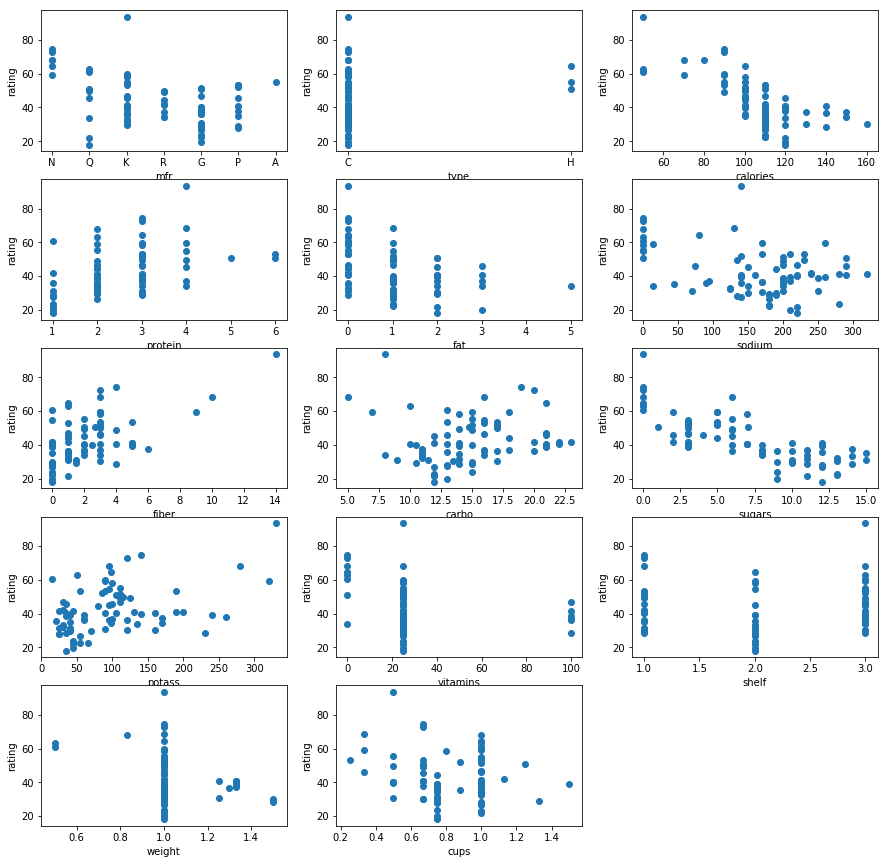

In [10]:
cereal_target_name = "rating"
cereal_target = cereal_data[cereal_target_name]
fig = plt.figure(figsize=(15, 15))

# The enumerate function will give us the index as well as the value
for (i, column) in enumerate(list(cereal_data.columns)):
  if(column == cereal_target_name) or (column == "name"):
    continue
  plt.subplot(5,3,i)
  plt.scatter(cereal_data[column], cereal_data[cereal_target_name])
  plt.xlabel(column)
  plt.ylabel(cereal_target_name)
  
plt.show()

**Note:** From the plots, we can see:
* A weak negative linear relationship between the rating and sugar 
* A positive linear relationship between rating and fiber.

#### Pearson’s Product-Moment Correlation
The most common measure of correlation is Pearson’s product-moment correlation, which is commonly referred to simply as the correlation, the correlation coefficient, or just the letter r (you can ignore the p for now)
:

- A correlation of 1 indicates a perfect positive correlation.
- A correlation of -1 indicates a perfect negative correlation.
- A correlation of 0 indicates that there is no relationship between the different variables.
- Values between -1 and 1 denote the strength of the correlation, as shown in the example below.

<img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/05/Pearson%E2%80%99s-Product-Moment-Correlation.png" alt="alt" width="500"/>

[source](https://www.displayr.com/what-is-correlation/)


#### Heatmap
Another way to view correlation between all variables in your dataset is a heatmap. If we denote the heatmap as $A$, then each $A_{ij}$ entry/box in the heatmap corresponds to the correlation between variables $i$ and $j$. Note that $-1<A_{ij}<1$. Also, note that $A_{ii}=1$, meaning that each variable is perfectly correlated with itself!


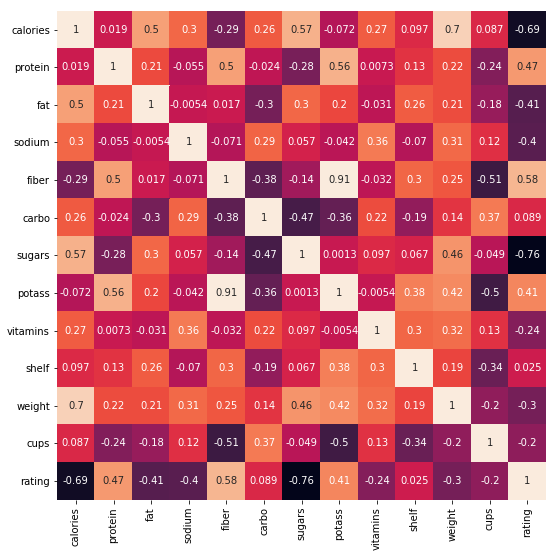

In [11]:
# seaborn is another plotting library, like matplotlib
import seaborn as sns
corrmat = cereal_data.corr()
f, ax = plt.subplots(figsize=(9, 9))
f = sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cbar=False)

count     77.000000
mean      98.666667
std       69.478004
min       15.000000
25%       45.000000
50%       90.000000
75%      120.000000
max      330.000000
Name: potass, dtype: float64


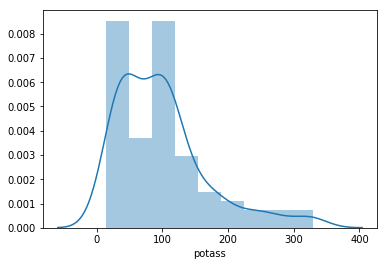

In [12]:
import seaborn as sns
print(cereal_data.potass.describe())
sns.distplot(cereal_data.potass)


# Challenges - Data Wrangling

For this lesson's challenge, we'll be using the dataset from 1985 Ward's Automotive Yearbook that is part of the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets) under [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile).  You can find a description of the data at [https://archive.ics.uci.edu/ml/datasets/automobile](https://archive.ics.uci.edu/ml/datasets/automobile). 

### Getting Points:

Each section of the challenge will have some instructions, please **carefully read these**. They will instruct you on how to 'submit' your answers. This will usually involve setting a variable to a specific value / DataFrame. 

The cell that follows the one that you edit will contain code that will submit your answer. **DO NOT CHANGE THIS CODE**. If you end up altering it, please seek out one of the volunteers and they'll help you out. 

## Set the 'email' variable below to the email you used to sign up for Cosmos (and run the cell)

In [0]:
# These are internal libraries used to manage your submissions to the challenges
# You won't have to install / import these in your normal usage
!pip install pycosmos --upgrade --quiet
from pycosmos import CosmosProject
tamu_datathon = CosmosProject('tamu_datathon')

email = "kiranrode@tamu.edu" # Enter your email here

## Loading & Describing Data - 10 Points

You can find the dataset we'll be loading at this link: https://cosmos-api-prod-datasetsbucket-iuph41amgzfj.s3.amazonaws.com/cars_data.csv

Load this data into pandas and calculate the descriptive statistics for it.

### Tasks to get points
* Set a variable named '*symboling_descriptive*' equal to the descriptive statistics for the column 'symboling'. You can get a column from a dataframe with square brackets. For example, if you have a dataframe named df and a column in df named col, df["col"] will get that column.
* Run the cell that follows this one
* Check the output of that cell to see whether you suceeded or whether any changes to your code are needed

In [0]:
# ENTER YOUR CODE HERE
import pandas as pd
loaded_data = pd.read_csv("https://cosmos-api-prod-datasetsbucket-iuph41amgzfj.s3.amazonaws.com/cars_data.csv")

# Set this variable equal to your answer
symboling_descriptive = loaded_data["symboling"].describe()
#loaded_data.head()

In [25]:
#@title Run to get points for: Loading & Describing Data (10 Points)
tamu_datathon.judge_attempt('load_describe_data', email, list(symboling_descriptive))

'Congratulations 🎉, you have completed the challenge! You earned 10 points.'

## Dealing with Missing Data - 10 Points

The data we previously loaded contains missing values. Now we need to deal with them. Replacing missing values with zeroes is trivial, so let's try something a little bit more difficult.

### Tasks to get points
* Replace the missing values in the data previously loaded with the **mean** of that column/feature
* After doing the step above, set the variable *losses_descriptive* to the descriptive statistics of the 'losses' column **after replacing the missing values**
* Run the cell that follows this one
* Check the output of that cell to see whether you suceeded or whether any changes to your code are needed


In [29]:
descriptive_stats = loaded_data.describe()

# Just having a variable name on a the last line of a cell outputs the value of
# that variable
descriptive_stats

,symboling,losses,wheel-base,length,width,height,weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [0]:

#losses_descriptive = loaded_data.describe()
#losses_descriptive

missing_data = loaded_data.fillna(loaded_data.mean())

# We'll use this data as our main dataset
losses_descriptive  = missing_data["losses"].describe()





In [39]:
#@title Run to get points for: Dealing with Missing Data (10 Points)
tamu_datathon.judge_attempt('deal_with_missing_data', email, list(losses_descriptive))

'Congratulations 🎉, you have completed the challenge! You earned 10 points.'

In [37]:
descriptive_stats = loaded_data.describe()

# Just having a variable name on a the last line of a cell outputs the value of
# that variable
descriptive_stats

,symboling,losses,wheel-base,length,width,height,weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visualizing Data - 10 Points

Now that we have the data ready, we can start looking at it. We'll be visualizing some features/columns and looking at their relationships.

### Tasks to get points
* Create a plot with the _price_ column on the y-axis and the _weight_ column on the x-axis
* Check the relationship between these variables, and store it in the *price_weight_relationship* variable
* Run the cell that follows this one
* Check the output of that cell to see whether you suceeded or whether any changes to your code are needed

## Note:

The values of the relationship can be 'Positive', 'Negative' or 'No Relationship'.

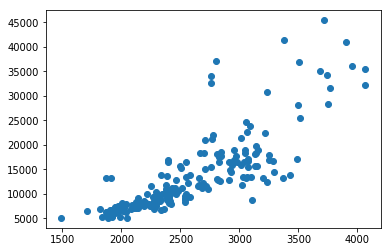

In [41]:
# ENTER YOUR CODE HERE
plt.scatter(missing_data["weight"], missing_data["price"])

# Set this variable equal to your answer (Hint: It should be a string)
price_weight_relationship = "positive"

In [42]:
#@title Run to get points for: Visualizing Data (10 Points)
tamu_datathon.judge_attempt('visualize_data', email, [price_weight_relationship])

'Congratulations 🎉, you have completed the challenge! You earned 10 points.'